In [2]:
import numpy as np
import torch as t
import matplotlib.pyplot as plt
import tqdm as tq
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation
import winsound
Freq = 2500 # Set Frequency To 2500 Hertz
Dur = 1000 # Set Duration To 1000 ms == 1 second


In [3]:
l=4

In [4]:
# t.exp(x)
# t.sin(x)
# t.lop(1+t.exp(x))
R=t.pi

def act(x):
    return t.sin(x)
#t.log(1+t.exp(x))

def actd(x):
    return t.cos(x)
#t.exp(x)/(1+t.exp(x))

def actdd(x):
    return -t.sin(x)
#(t.exp(x)*(1+t.exp(x))-t.exp(x)**2)/(1+t.exp(x))**2

def actddd(x):
    return -t.cos(x)
#(t.exp(x)*(1-t.exp(x)))/(1+t.exp(x))**3

def L2(c,w,x):
    a=0
    n=x.size(0)
    for i in range(n):
        a=a+net(c,w,x[i])**2
    return (R/n)*a

def E(x,c,w):
    a=0
    n=x.size(0)
    m=c.size(0)
    norm=0
    for i in range(n):
        e=0
        p=0
        z=0
        norm=norm+0 #(t.matmul(c,act(w*x[i]))**2 -1/t.pi )
        for j in range(m):
            e=e+c[j]*((w[j]**2)*actdd(w[j]*x[i])+l*act(w[j]*x[i]))
            p=p+c[j]*act(w[j]*t.pi)
            z=z+c[j]*act(t.zeros(1))
        a=a+e**2+p**2+z**2 
    return a+((t.pi/n)*norm)**2

def net(c,w,x):
    return t.matmul(c,act(w*x))


def grad(x,c,w):
    m=c.size(0)
    n=x.size(0)
    c_grad=t.randn(m)
    w_grad=t.randn(m)
    for i in range(n):
        for j in range(m):
            c_1=2*c[j]*((w[j]**2)*actdd(w[j]*x[i])+l*act(w[j]*x[i]))*((w**2)*actdd(w*x[i])+l*act(w*x[i]))
            c_2=2*c[j]*act(w[j]*t.pi)*act(w*t.pi)
            c_3=2*c[j]*act(t.zeros(1))*act(t.zeros(1))
            c_n=4*(L2(c,w,x)-1)*c[j]*act(w[j]*x[i])*act(w[j]*x[i])
            w_1=2*c[j]*c*((w[j]**2)*actdd(w[j]*x[i])+l*act(w[j]*x[i]))*(2*w*actdd(w*x[i])+x[i]*actddd(w*x[i])*w**2+l*x[i]*actd(w*x[i]))
            w_2=2*c[j]*c*act(w[j]*t.pi)*t.pi*actd(t.pi*w)
            w_3=t.zeros(1)
            w_n=4*(L2(c,w,x)-1)*c[j]*act(w[j]*x[i])*c[j]*actd(w[j]*x[i])
            c_grad=c_grad+c_1+c_2+c_3+c_n
            w_grad=w_grad+w_1+w_2+w_3+w_n
    return c_grad, w_grad

def optimization(n,m,T,r):
    print('Optimization started')
    x=t.tensor([i*(t.pi/n) for i in range(n)])
    w=t.randn(m)
    c=t.randn(m)
    Error=t.zeros(T)
    L2_Error=t.zeros(T)
    plots=[]
    for k in tq.tqdm(range(T)):
        G=grad(x,c,w)
        c=c-r*G[0]
        w=w-r*G[1]
        Error[k]=E(x,c,w)
        L2_Error[k]=L2(c,w,x)
        if np.isnan(Error[k])==True:
            break
        a=t.tensor([net(c,w,x[i]) for i in range(n)])
        plt.plot(x,a)
        plt.plot(x,f(x))
        plt.xlabel(k/T)
        if k==0:
            fig, ax = plt.figure(), plt.axes(xlim=(0, R), ylim=(-1, 1.5))
        else:
            dummy_fig, ax = plt.figure(), plt.axes(xlim=(0, R), ylim=(-1, 1.5))
            ax.set(animated=True)
            ax.remove()
            ax.figure = fig
            fig.add_axes(ax)
            plt.close(dummy_fig)
        
        plots.append([ax])

    ani = animation.ArtistAnimation(fig, plots, interval=50, repeat_delay=20000)
    ani.save("Elliptic.gif")
    winsound.Beep(Freq,Dur)
    winsound.Beep(Freq,Dur)
    return c,w,Error, L2_Error

def f(x):
    return (2/t.pi)*t.sin(t.sqrt(l*t.ones(1))*x)

#def f(n,m,T,r):
 #   a=t.zeros(n)
  #  x=t.tensor([i*(t.pi/n) for i in range(n)])
   # param=optimization(n,m,T,r)
    #print('function is going to be presented')
    #for i in tq.tqdm(range(n)):
    #    a[i]=t.matmul(param[0],act(param[1]*x[i]))
    #return a, param[2]

In [5]:
n=20
m=20
T=100
r=0.00001

Optimization started


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:06<00:00,  1.50it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


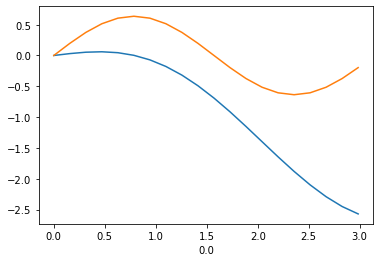

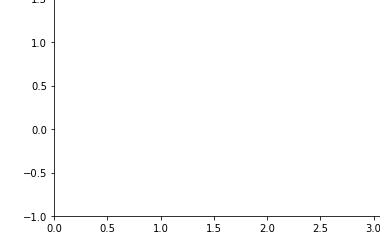

In [6]:
A=optimization(n,m,T,r)

In [7]:
x=t.tensor([i*(t.pi/n) for i in range(n+1)])

In [8]:
a=t.zeros(n+1)
for i in tq.tqdm(range(n+1)):
    a[i]=t.matmul(A[0],act(A[1]*x[i]))

100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 20355.99it/s]


In [9]:
V=t.zeros(n)

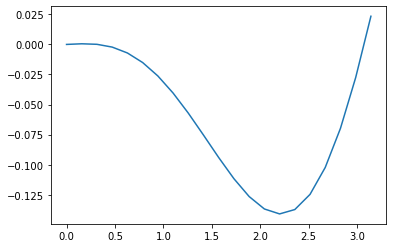

In [15]:
plt.plot(x,a)

In [11]:
A

(tensor([-0.7879, -0.0303, -0.2682, -1.4720, -0.1797, -0.3763, -1.1114, -0.4420,
          0.7750, -0.0049, -0.1245, -1.1042,  1.3505, -0.2067, -0.3261, -1.3480,
         -0.0076, -0.0128, -0.4357,  0.5712]),
 tensor([ 0.1731,  1.8836, -0.2676,  1.0748,  0.0325,  0.6874, -0.0438,  0.2125,
          0.6822,  0.0582, -1.1779,  0.6504,  0.9598,  0.9421, -1.5180, -0.6188,
          0.8573,  1.2493, -0.1026, -0.6850]),
 tensor([5.9308e+02, 4.5980e+02, 3.5867e+02, 2.8107e+02, 2.2097e+02, 1.7424e+02,
         1.3774e+02, 1.0911e+02, 8.6612e+01, 6.8907e+01, 5.4911e+01, 4.3865e+01,
         3.5083e+01, 2.8132e+01, 2.2626e+01, 1.8220e+01, 1.4714e+01, 1.1908e+01,
         9.6697e+00, 7.8674e+00, 6.4276e+00, 5.2661e+00, 4.3319e+00, 3.5763e+00,
         2.9630e+00, 2.4659e+00, 2.0606e+00, 1.7307e+00, 1.4640e+00, 1.2432e+00,
         1.0599e+00, 9.1194e-01, 7.8970e-01, 6.8796e-01, 6.0167e-01, 5.3028e-01,
         4.7139e-01, 4.2224e-01, 3.8318e-01, 3.5050e-01, 3.2302e-01, 3.0179e-01,
         2.8569

([<matplotlib.lines.Line2D at 0x2269064a100>], tensor(0.9960))

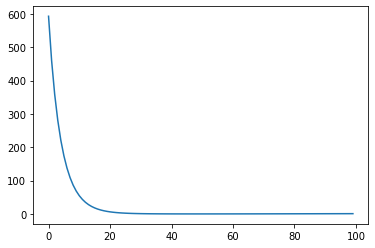

In [12]:
plt.plot(A[2]), A[2][-1]

In [13]:
t.matmul(A[0],act(A[1]*t.pi))

tensor(0.0234)

In [14]:
L2(A[0],A[1],x)

tensor(0.0207)